# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. 데이터 분석

In [3]:
print(f'Value Counts of each columns')
for i in df.columns:
    print(f'[column : {i}]')
    print(df[i].value_counts())

Value Counts of each columns
[column : User_ID]
1002063    12
1005795    12
1001980    11
1004344    11
1006036    10
           ..
1004980     1
1004385     1
1004138     1
1002648     1
1000837     1
Name: User_ID, Length: 2656, dtype: int64
[column : Product_ID]
P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64
[column : Gender]
M    3765
F    1233
Name: Gender, dtype: int64
[column : Age]
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
[column : Occupation]
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64
[column : City_Category]
B    2102
C    1555
A  

In [6]:
len(df)

4998

In [2]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

결측치를 단순 제거하기엔 비율이 크다고 판단하여 결측치를 채우기로 했다.

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
imputer = SimpleImputer(strategy='most_frequent')
df[['Product_Category_2', 'Product_Category_3']] = imputer.fit_transform(df[['Product_Category_2', 'Product_Category_3']])

In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

최빈값으로 대치되었음을 확인

In [6]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

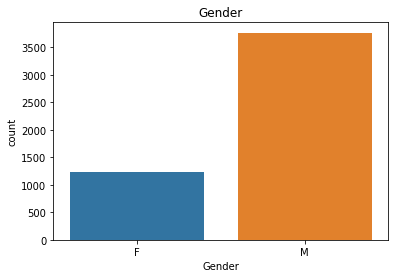

In [8]:
sns.countplot(x='Gender',data=df)
plt.show()

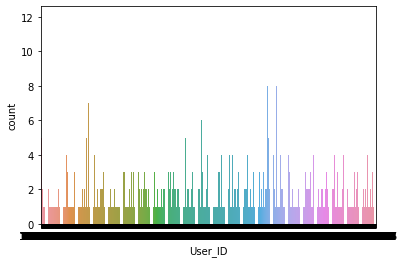

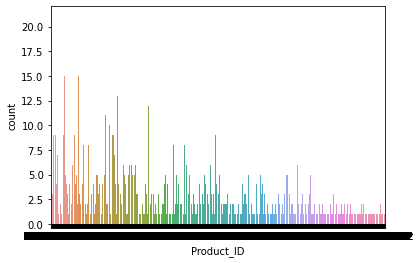

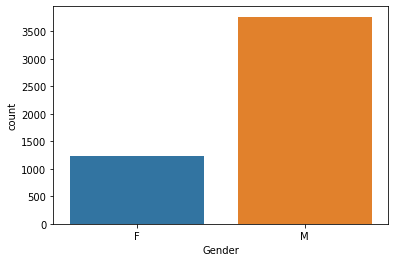

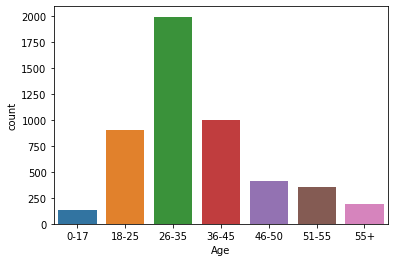

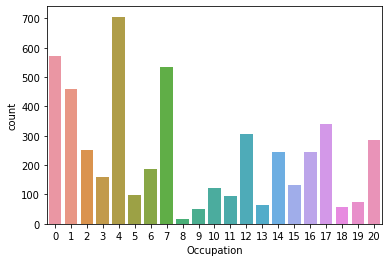

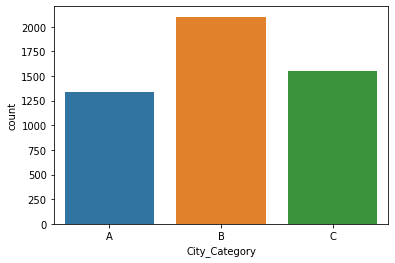

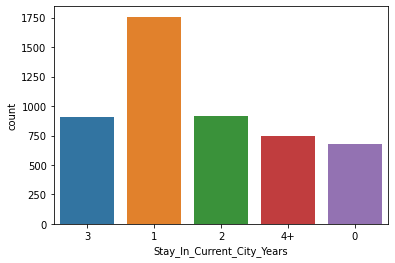

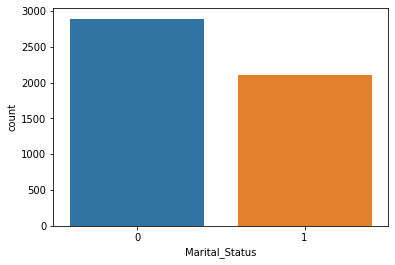

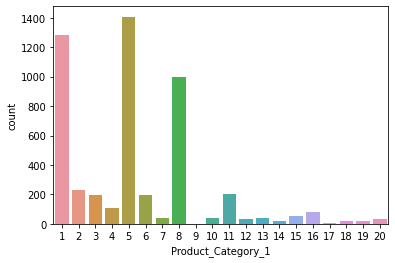

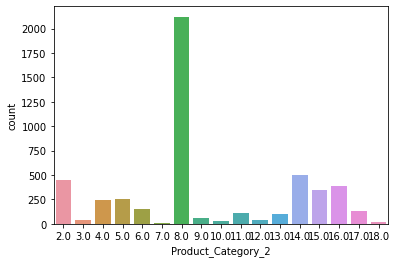

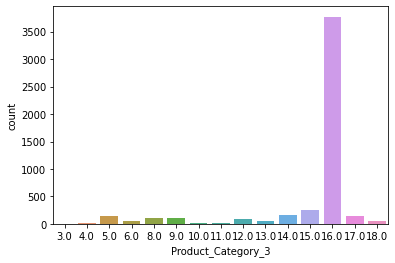

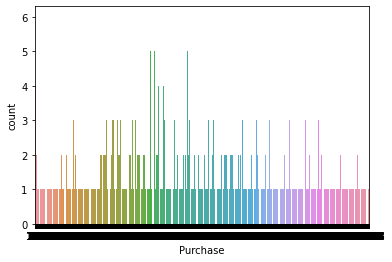

In [9]:
for title in df.columns:
    sns.countplot(x=title, data = df)
    plt.show()

* Gender을 보면 대부분 구매자는 남성이었다.
* Marital_Status : single들이 기혼자들에 비해 많다.
* Age : 18-25, 26-35, 36-45세가 많다.
* Occupation : 4, 0, 7순으로 특정 직종의 비율이 높음
* City_Category : B도시 거주자가 다른 도시들에 비해 많음
* Stay_In_Current_City_Years : 한 도시에서 1년 산 사람의 구매비율이 높음
* Product_Category_1 : 1, 5, 8번 구매율이 높음
* Product_Category_2 : 8번이 압도적이고 2, 14,15,16 구매율이 높음
* Product_Category_3 : 16번 구매율이 높음

<AxesSubplot:xlabel='Age', ylabel='count'>

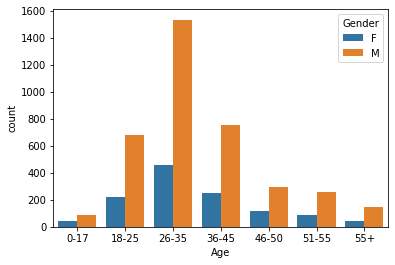

In [12]:
sns.countplot(x='Age',hue = "Gender",data = df)

나이대에 따른 성비를 확인

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

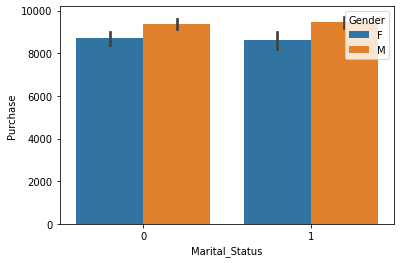

In [7]:
sns.barplot(x='Marital_Status',y='Purchase',hue = 'Gender',data =df)

기혼 여부에 따라 지출비용에 큰 차이는 없었다. 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

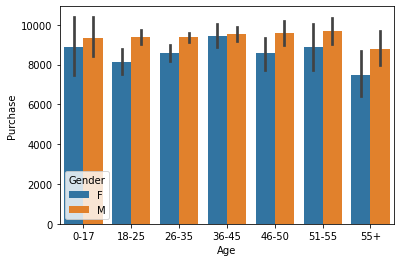

In [13]:
sns.barplot(x='Age', y='Purchase', hue = 'Gender', data = df)

나이에 따라 지출비용의 큰 차이는 없다. 51-55세가 근소하게 높다.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

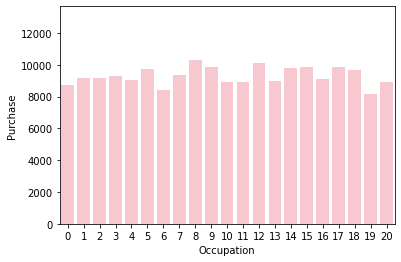

In [10]:
sns.barplot(x='Occupation',y='Purchase',color='pink',data = df, errwidth=0)

직종에 상관없이 지출 비율이 동일하다.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

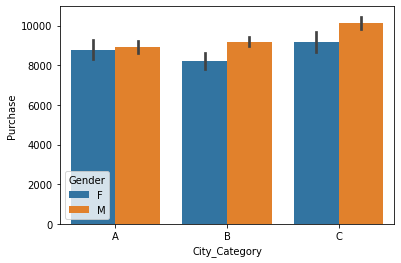

In [11]:
sns.barplot(x='City_Category',y='Purchase',hue='Gender',data = df)

앞서 확인했을 때 도시 B 거주자가 많지만 지출 비용은 도시 C에서 높았다.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

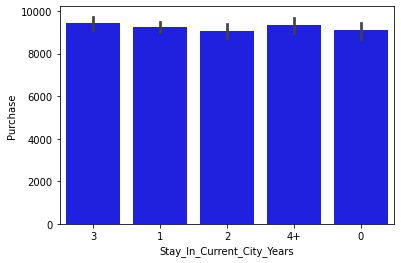

In [12]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',color = 'blue',data = df)

1년 산 사람들의 구매율이 높았으나 지출비용은 거의 동일하다.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

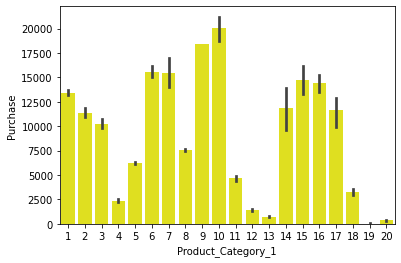

In [17]:
sns.barplot(x='Product_Category_1',y = 'Purchase', color = 'yellow',data = df)

1,5,8번 물품이 많았다. 그렇지만 지출 금액이 높은건 10, 9, 6, 7이다.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

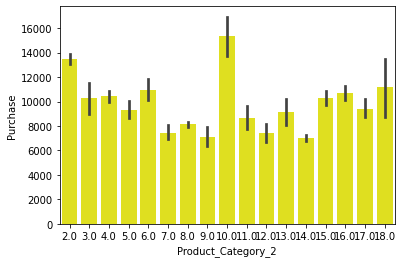

In [18]:
sns.barplot(x='Product_Category_2',y = 'Purchase', color = 'yellow',data = df)

10, 2번 품목이 지출비용이 높다.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

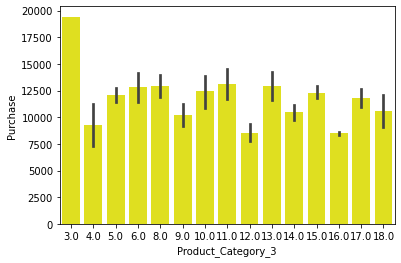

In [19]:
sns.barplot(x='Product_Category_3',y = 'Purchase', color = 'yellow',data = df)

3번 품목이 압도적으로 높다.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

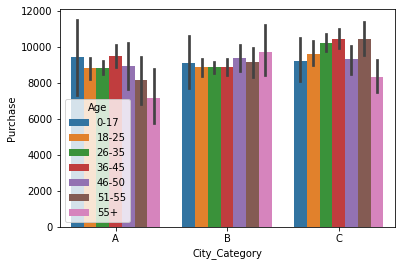

In [20]:
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = df)

* A의 경우 0-17, 36-45세에서 지출비용이 높다.
* B의 경우 55+에서 높고 그 다음은 46-50,0-17이다.
* C의 경우 51-55, 36-45, 26-35이다. 

## 2. 데이터 전처리

In [24]:
import numpy as np

In [ ]:
df.drop(columns = ['User_ID','Product_ID'])

In [28]:
# 학습에 필요없는 데이터 제거
df['Gender'] = np.where(df['Gender']=='M', 0, 1)
# Age, City_Category는 원-핫 인코딩으로 처리
columns = ['Age', 'City_Category']
for col in columns:
    dummies = pd.get_dummies(df[col],prefix=col)
    df = df.join(dummies)
    df = df.drop(columns = col)

In [32]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+').astype('float')

In [33]:
df.head

<bound method NDFrame.head of       Gender  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0          1          10                         3.0               0   
1          1          10                         1.0               0   
2          1          10                         1.0               0   
3          1          10                         3.0               0   
4          1          10                         3.0               0   
...      ...         ...                         ...             ...   
4993       0           7                         1.0               1   
4994       0           1                         1.0               1   
4995       0          13                         3.0               1   
4996       0           0                         2.0               1   
4997       0           6                         0.0               1   

      Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                      5   

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [34]:
y = df['Purchase']
x = df.drop(columns='Purchase')

In [35]:
x

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1,10,3.0,0,5,17.0,16.0,1,0,0,0,0,0,0,1,0,0
1,1,10,1.0,0,7,8.0,16.0,1,0,0,0,0,0,0,1,0,0
2,1,10,1.0,0,1,4.0,16.0,1,0,0,0,0,0,0,1,0,0
3,1,10,3.0,0,2,4.0,16.0,1,0,0,0,0,0,0,1,0,0
4,1,10,3.0,0,3,5.0,16.0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0,7,1.0,1,1,16.0,16.0,0,0,0,0,0,0,1,0,0,1
4994,0,1,1.0,1,8,8.0,16.0,0,0,0,0,0,0,1,0,0,1
4995,0,13,3.0,1,1,6.0,14.0,0,0,0,0,0,0,1,0,0,1
4996,0,0,2.0,1,12,8.0,16.0,0,0,0,0,0,0,1,0,0,1


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)
KNN = KNeighborsRegressor(n_neighbors = 11, weights = "distance")
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [57]:
print(KNN.score(x_test, y_test))

0.39792714979293486


테스트셋의 점수를 확인한 결과 결과가 그리 좋진 않았다. 